### Loading packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import fashion_mnist

### Loading the dataset

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor*tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor*tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy,clip_value_min=0.,clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy,clip_value_min=0.,clip_value_max=1.)

In [ ]:
tf.random.normal([2,2],0,1,tf.float32)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.902117  , -0.21040438],
       [-0.6189163 ,  0.7031587 ]], dtype=float32)>

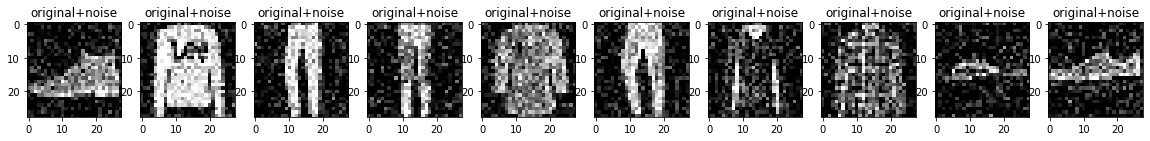

In [ ]:
n=10
plt.figure(figsize=(20,2))
for i in range(n):
    ax=plt.subplot(1,n,i+1)
    plt.title("original+noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Autoencoder Model Architecture

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise,self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),
            layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2),
            layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8,kernel_size=3,strides=2,padding='same'),
            layers.Conv2DTranspose(16,kernel_size=3,strides=2,padding='same'),
            layers.Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same')])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

### Autoencoder Model Training

In [ ]:
autoencoder.fit(x_train_noisy,x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0166 - val_loss: 0.0098
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 10/10
1875/1875 [==============================] - 70s 37m

### Image Denosing

In [ ]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

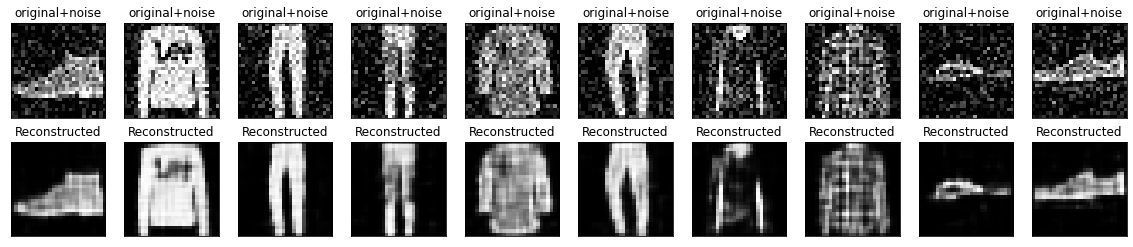

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.title("original+noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx=plt.subplot(2,n,i+n+1)
    plt.title("Reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()